In [1]:
import random
import pandas
import matplotlib

MIN_LENGTH: int = 3
ALPHABET: str = 'abcdefghijklmnopqrstuvwxyz'

def read_data(url: str) -> list:
    names = []
    with open(url, 'r') as file:
        a = file.readline()
        while a:
            names.append('^' + a.replace('\n', '$'))
            a = file.readline()
    return names


class LanguageModel:
    def __init__(self):
        self.count: dict = {}
        self.context: dict = {}
        self.char_number = 0

    def update(self, name: str) -> None:
        bigrams = self.get_bigrams(name)
        self.char_number += len(name) - 2

        for bigram in bigrams:
            if bigram in self.count:
                self.count[bigram] += 1
            else:
                self.count[bigram] = 1

            if bigram[0] in self.context:
                self.context[bigram[0]].append(bigram[1])
            else:
                self.context[bigram[0]] = [bigram[1]]

    def get_bigrams(self, word: str) -> list:
        length = len(word)
        bigrams = []
        for i in range(length - 1):
            bigrams.append((word[i], word[i + 1]))
        return bigrams

    def get_next(self, context: str) -> str:
        variants = self.context[context]
        return random.choice(variants)

    def generate(self) -> str:
        word = ''
        next = self.get_next('^')
        previous = ''
        while next != '$' or len(word) < MIN_LENGTH:
            if next == '$':
                next = self.get_next(previous)
                continue
            word += next
            previous = next
            next = self.get_next(next)
        return word

    def get_probability(self, character: str) -> dict:
        variants = self.context[character]
        data = {}
        for char in variants:
            if char in data:
                data[char] += 1
            else:
                data[char] = 1
        data.pop('$')
        #for key, value in data.items():
        #    data[key] = round(value / self.char_number, 5)
        return data

    def get_all_probabilities(self) -> dict:
        result = {}
        for char in ALPHABET:
            data = self.get_probability(char)
            for i in ALPHABET:
                if i not in data:
                    data[i] = 0
            result[char] = sorted(list(data.items()), key=lambda x:x[0])
        return result


def create_language_model(data: list) -> LanguageModel:
    model = LanguageModel()
    for name in data:
        model.update(name)
    return model


url = 'names.txt'
data = read_data(url)
model = create_language_model(data)
name = model.generate()
print(name)

shishmya


In [2]:
pandas.DataFrame(model.get_all_probabilities())

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,"(a, 556)","(a, 321)","(a, 815)","(a, 1303)","(a, 679)","(a, 242)","(a, 330)","(a, 2244)","(a, 2445)","(a, 1473)",...,"(a, 13)","(a, 2356)","(a, 1201)","(a, 1027)","(a, 163)","(a, 642)","(a, 280)","(a, 103)","(a, 2143)","(a, 860)"
1,"(b, 541)","(b, 38)","(b, 0)","(b, 1)","(b, 121)","(b, 0)","(b, 3)","(b, 8)","(b, 110)","(b, 1)",...,"(b, 0)","(b, 41)","(b, 21)","(b, 1)","(b, 103)","(b, 1)","(b, 1)","(b, 1)","(b, 27)","(b, 4)"
2,"(c, 470)","(c, 1)","(c, 42)","(c, 3)","(c, 153)","(c, 0)","(c, 0)","(c, 2)","(c, 509)","(c, 4)",...,"(c, 0)","(c, 99)","(c, 60)","(c, 17)","(c, 103)","(c, 0)","(c, 0)","(c, 4)","(c, 115)","(c, 2)"
3,"(d, 1042)","(d, 65)","(d, 1)","(d, 149)","(d, 384)","(d, 0)","(d, 19)","(d, 24)","(d, 440)","(d, 4)",...,"(d, 0)","(d, 187)","(d, 9)","(d, 0)","(d, 136)","(d, 1)","(d, 8)","(d, 5)","(d, 272)","(d, 2)"
4,"(e, 692)","(e, 655)","(e, 551)","(e, 1283)","(e, 1271)","(e, 123)","(e, 334)","(e, 674)","(e, 1653)","(e, 440)",...,"(e, 1)","(e, 1697)","(e, 884)","(e, 716)","(e, 169)","(e, 568)","(e, 149)","(e, 36)","(e, 301)","(e, 373)"
5,"(f, 134)","(f, 0)","(f, 0)","(f, 5)","(f, 82)","(f, 44)","(f, 1)","(f, 2)","(f, 101)","(f, 0)",...,"(f, 0)","(f, 9)","(f, 2)","(f, 2)","(f, 19)","(f, 0)","(f, 2)","(f, 3)","(f, 12)","(f, 0)"
6,"(g, 168)","(g, 0)","(g, 2)","(g, 25)","(g, 125)","(g, 1)","(g, 25)","(g, 2)","(g, 428)","(g, 0)",...,"(g, 0)","(g, 76)","(g, 2)","(g, 2)","(g, 47)","(g, 0)","(g, 1)","(g, 0)","(g, 30)","(g, 1)"
7,"(h, 2332)","(h, 41)","(h, 664)","(h, 118)","(h, 152)","(h, 1)","(h, 360)","(h, 1)","(h, 95)","(h, 45)",...,"(h, 0)","(h, 121)","(h, 1285)","(h, 647)","(h, 58)","(h, 1)","(h, 23)","(h, 1)","(h, 22)","(h, 43)"
8,"(i, 1650)","(i, 217)","(i, 271)","(i, 674)","(i, 818)","(i, 160)","(i, 190)","(i, 729)","(i, 82)","(i, 119)",...,"(i, 13)","(i, 3033)","(i, 684)","(i, 532)","(i, 121)","(i, 911)","(i, 148)","(i, 102)","(i, 192)","(i, 364)"
9,"(j, 175)","(j, 1)","(j, 3)","(j, 9)","(j, 55)","(j, 0)","(j, 3)","(j, 9)","(j, 76)","(j, 2)",...,"(j, 0)","(j, 25)","(j, 2)","(j, 3)","(j, 14)","(j, 0)","(j, 0)","(j, 0)","(j, 23)","(j, 2)"


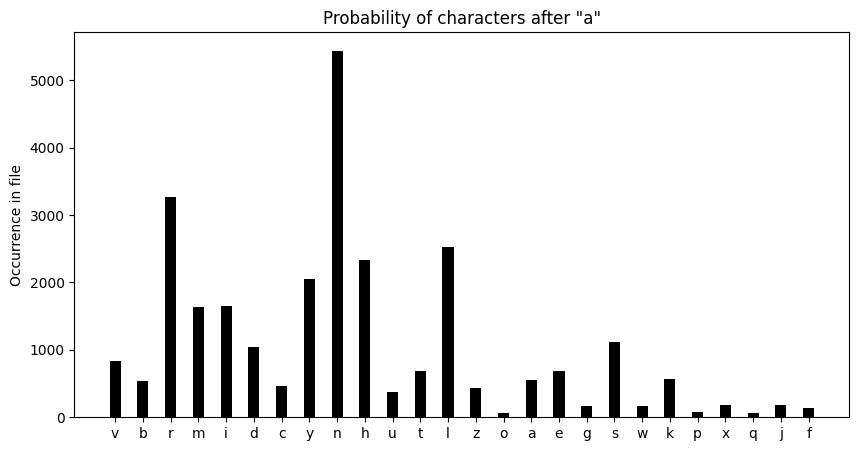

In [5]:
import matplotlib.pyplot as plt


data = model.get_probability('a')
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
plt.bar(courses, values, color ='black',
        width = 0.4)
 

plt.ylabel("Occurrence in file")
plt.title('Probability of characters after "a"')
plt.show()

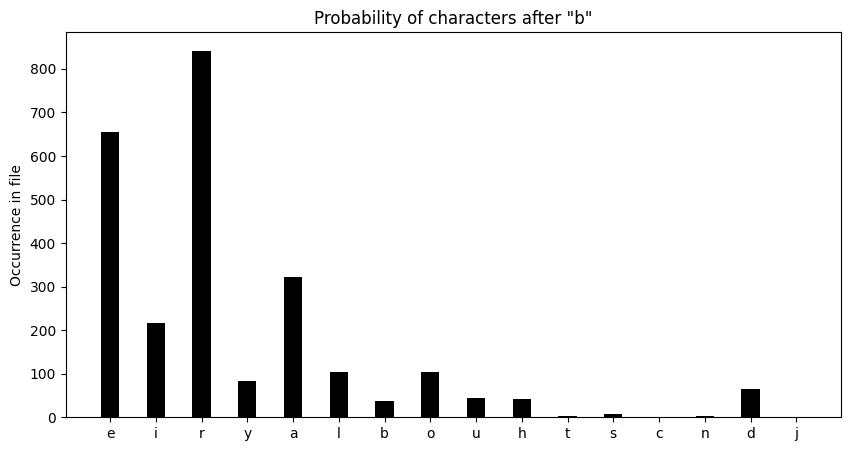

In [6]:
data = model.get_probability('b')
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
plt.bar(courses, values, color ='black',
        width = 0.4)
 

plt.ylabel("Occurrence in file")
plt.title('Probability of characters after "b"')
plt.show()

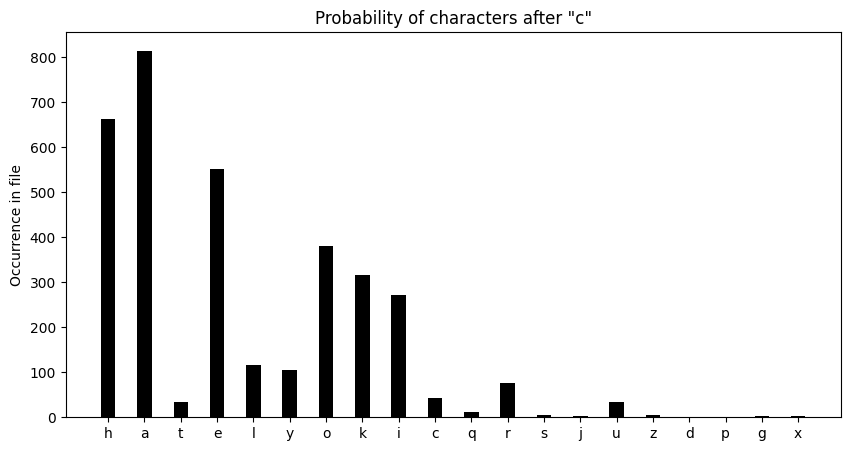

In [7]:
data = model.get_probability('c')
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
plt.bar(courses, values, color ='black',
        width = 0.4)
 

plt.ylabel("Occurrence in file")
plt.title('Probability of characters after "c"')
plt.show()